<a href="https://colab.research.google.com/github/Angelina151612/Sentiment-analysis-with-tweets/blob/br1/Source/train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter, OrderedDict
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import seaborn as sns
import pickle

In [ ]:
def open_file(path):
    with open(path, encoding="cp1252") as readfile:
        df = pd.read_csv(readfile)
    df = df[df['tweet'].notna()]
    df = df.sample(frac=1)  # mix data
    return df['tweet'], df['mark']

In [ ]:
def get_max_len(tweets):
    max = 0
    for tweet in tweets:
        words = len(tweet)
        if words > max:
            max = words
    return max

In [ ]:
def get_dictionary():
    with open('/content/drive/MyDrive/Colab Notebooks/Sentiment analysis with tweets/Data/dict.txt', 'rb') as file:
        return pickle.load(file)

In [ ]:
def preapare_tweets(x):
    max_tweet_len = get_max_len(x)
    x = x.apply(lambda tweet: tweet.split())
    words = get_dictionary()
    for tweet in x:
        for j, word in enumerate(tweet):
            if word in words.keys():
                tweet[j] = words[word]
            else:
                tweet[j] = 0
    return pad_sequences(x, maxlen=max_tweet_len), max_tweet_len

In [ ]:
def prepare_labels(y):
    positive = 4
    for i, label in enumerate(y):
        if label == positive:
            y[i] = 1
    return np.array(y)

In [ ]:
def create_model_binary(max_tweet_len):
    model = Sequential()
    model.add(Embedding(65001, max_tweet_len))
    model.add(SimpleRNN(8))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model

In [ ]:
def plot_data(history, metric):
    data = pd.DataFrame()
    data['epoch'] = range(3)
    data[metric] = history[metric]
    data['val_' + metric] = history['val_' +  metric]
    print(data)
    sns.set(style = 'darkgrid')
    sns.lineplot(x = 'epoch', y = 'value',hue = 'variable', data=pd.melt(data, ['epoch']))


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Sentiment analysis with tweets/Data/prepared_data.csv'
x, y = open_file(path)
x, max_tweet_len = preapare_tweets(x)
y = prepare_labels(y.values)
 
x_test = x[:90000]
y_test = y[:90000]
 
print('test\n', Counter(y_test))
x_train = x[90000:]
y_train = y[90000:]
print('\ntrain\n', Counter(y_train))

test
 Counter({0: 78935, 1: 11065})

train
 Counter({0: 717828, 1: 100752})


In [ ]:
model = create_model_binary(max_tweet_len)

In [ ]:
history = model.fit(x_train, y_train, epochs=3, batch_size = 512, validation_data = (x_test, y_test))

Epoch 1/3
1599/1599 [==============================] - 315s 196ms/step - loss: 0.3297 - accuracy: 0.8800 - val_loss: 0.2802 - val_accuracy: 0.8911
Epoch 2/3
1599/1599 [==============================] - 311s 194ms/step - loss: 0.2489 - accuracy: 0.9031 - val_loss: 0.2824 - val_accuracy: 0.8910
Epoch 3/3
1599/1599 [==============================] - 308s 193ms/step - loss: 0.2228 - accuracy: 0.9149 - val_loss: 0.2904 - val_accuracy: 0.8890


   epoch  accuracy  val_accuracy
0      0  0.887020      0.891122
1      1  0.902060      0.891022
2      2  0.912337      0.889033


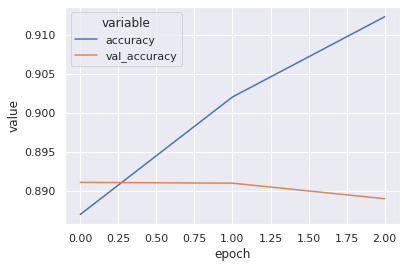

In [ ]:
plot_data(history.history, metric = 'accuracy')

   epoch      loss  val_loss
0      0  0.298008  0.280173
1      1  0.251693  0.282439
2      2  0.227561  0.290384


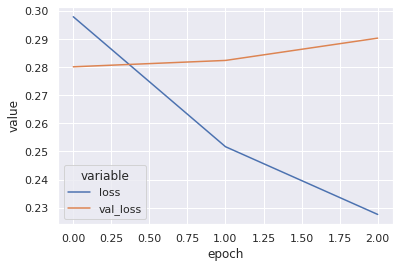

In [ ]:
plot_data(history.history, metric = 'loss')

In [ ]:
model.save(r'/content/drive/MyDrive/Colab Notebooks/Sentiment analysis with tweets/SimpleRNN_batch_size_128.h5')